# Silhouette Clustering

Silhouette is a **metric to evaluate how well your clustering has performed**. It doesn’t create clusters itself, but measures the **quality of clusters** obtained by a clustering algorithm (like K-Means, DBSCAN, etc.).

It answers two questions for each data point:

1. **How close is this point to its own cluster?** (cohesion)
2. **How far is this point from other clusters?** (separation)

A **high silhouette score** → the point is well matched to its cluster and poorly matched to others.

---

## **2. Mathematical Definition**

For a data point $i$:

1. $a(i)$ = average distance of $i$ to all other points in its **own cluster**
2. $b(i)$ = minimum average distance of $i$ to points in any **other cluster** (the closest cluster that i is not in)

The **silhouette score** $s(i)$ for the point $i$ is:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

* $s(i)$ ranges from **-1 to 1**:

  * Close to **1** → well-clustered
  * Around **0** → on the boundary between clusters
  * Negative → may be in the wrong cluster

The **average silhouette score** over all points is used to measure overall clustering quality.

---

## **3. Intuition**

* If $a(i) \ll b(i)$ → point is **closer to its cluster than others** → good clustering.
* If $a(i) \approx b(i)$ → point is **on the boundary**.
* If $a(i) > b(i)$ → point may be **misclassified**.

---

## **4. Workflow**

1. Perform clustering (e.g., K-Means, DBSCAN, Agglomerative).
2. Compute silhouette score for **each data point**.
3. Compute **average silhouette score** to evaluate the clustering.
4. Optionally, plot **silhouette values** for all clusters to visually inspect cluster quality.

---

## **5. Python Example (K-Means)**


Average Silhouette Score: 0.8480303059596955


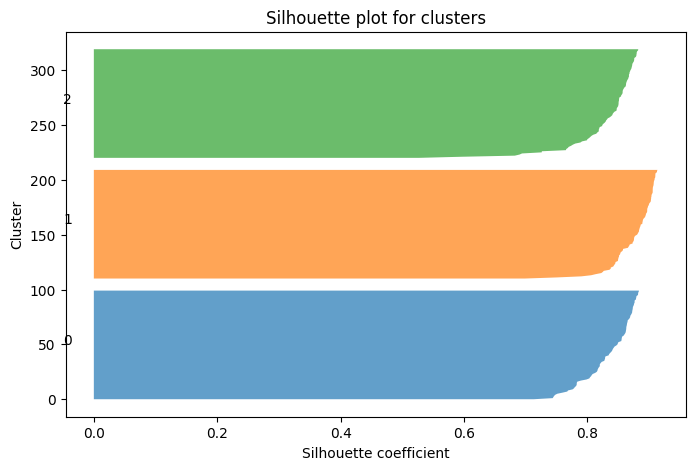

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Silhouette score
avg_score = silhouette_score(X, labels)
print("Average Silhouette Score:", avg_score)

# Silhouette values per sample
sil_values = silhouette_samples(X, labels)

# Plotting silhouette
plt.figure(figsize=(8, 5))
y_lower = 0
for i in range(3):
    cluster_sil = sil_values[labels == i]
    cluster_sil.sort()
    y_upper = y_lower + len(cluster_sil)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_sil, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5*len(cluster_sil), str(i))
    y_lower = y_upper + 10
plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette plot for clusters")
plt.show()


✅ **Interpretation**:

* Each cluster gets a band of silhouette values.
* Longer bands → better cohesion.
* Short or negative values → misfit points.

